In [1]:
#----------------------------
# import libraries
#----------------------------
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# scikit-learn
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
#----------------------------
#use fixed point notation
np.set_printoptions(suppress=True)

**output** <br>
1 – caminhada <br>
2 – subindo escadas <br>
3 – descendo escadas <br>
4 – sentado <br>
5 – em pé <br>
6 – deitado <br>
<br>
**one-hot enconding** <br>
[1 0 0 0 0 0]$^T$: walking <br>
[0 1 0 0 0 0]$^T$: climbing stairs <br>
[0 0 1 0 0 0]$^T$: going down stairs <br>
[0 0 0 1 0 0]$^T$: seated <br>
[0 0 0 0 1 0]$^T$: standing <br>
[0 0 0 0 0 1]$^T$: lying <br>


In [2]:
def zero_one_loss(y_true, y_pred):
    diff = (y_true - y_pred)
    # if class is right, row has only zeros
    # if class is wrong, real and predicted colums have values 0.5
    half = (diff * diff) / 2
    # sum rows
    row_sum = np.sum(half, axis=1)
    error = np.sum(row_sum)
    loss = error / len(y_true)
    return loss

In [3]:
# path to save figures
path = 'figures/ex2-knn/'
# read training data
X_train_df = pd.read_fwf('X_train.txt', header=None)
y_train_df = pd.read_csv('y_train.txt', header=None)
# read test data
X_test_df = pd.read_fwf('X_test.txt', header=None)
y_test_df = pd.read_csv('y_test.txt', header=None)

In [4]:
# convert DataFrame to NumPy array
X_train_raw = X_train_df.to_numpy()
X_test_raw = X_test_df.to_numpy()
y_train_raw = y_train_df.to_numpy()
y_test_raw = y_test_df.to_numpy()

In [5]:
enc = OneHotEncoder(categories='auto')
enc.fit(y_train_raw)
def one_hot_encoder(y):
    return enc.transform(y).toarray()
def one_hot_decoder(y):
    return enc.inverse_transform(y)

In [6]:
# data standardization: x' = (x - u) / s
scaler = StandardScaler()
#----------------------------
# join X_train and X_test
X_set_raw = np.append(X_train_raw, X_test_raw, axis=0)
# perform standardization with x data
scaler.fit(X_set_raw)
X_set = scaler.transform(X_set_raw)
# split X data again in train and test
X_train = X_set[:7352,:]
X_test = X_set[7352:,:]

In [7]:
# one-hot encoding
y_train = one_hot_encoder(y_train_df)
y_test = one_hot_encoder(y_test_df)

In [8]:
#----------------------------
# training
#----------------------------
x = X_train
y = y_train

Minkowski distance:

$ \displaystyle d(x,y) = \left( \sum_{i=1}^{K} |x_i - y_i|^p \right)^{1/p}$

For $p = 2$, we have the Euclidian distance:

$ \displaystyle d(x,y) = \sqrt{\sum_{i=1}^{K} |x_i - y_i|^2}$

In [9]:
# size of training set
N = X_train.shape[0]
# size of test set
M = X_test.shape[0]
# number of features
K = X_train.shape[1]
# number of classes
C = len(enc.categories_[0])

$dist$ shape: (M x N)
<br>

$ \displaystyle 
dist = \begin{bmatrix}
    d(x_{T_0},x_{D_0}) & d(x_{T_0},x_{D_1}) &   ...  & d(x_{T_0},x_{D_N}) \\ 
    d(x_{T_1},x_{D_0}) & d(x_{T_1},x_{D_1}) &   ...  & d(x_{T_1},x_{D_N}) \\ 
           \vdots      &       \vdots       & \ddots &        \vdots      \\
    d(x_{T_M},x_{D_0}) & d(x_{T_M},x_{D_1}) &   ...  & d(x_{T_M},x_{D_N}) \\ 
\end{bmatrix} $

Where:
* $x_{T_M}$ is the M$^{th}$ sample of training set
* $x_{D_N}$ is the N$^{th}$ sample of data set
* $d(x_{T_M},x_{D_N})$ is the Minkowski distance between the points $x_{T_M}$ and $x_{D_N}$

In [21]:
# inputs: x, y --> 2D-arrays (N x K)
# output: dist --> 2D-array (N x 1)
def minkowski_distance(x, y, p):
    power = np.power((x - y), p)
    dist = np.power( np.sum(power, axis=1), 1/p )
    return dist.reshape(N,1).T

In [11]:
dist = np.zeros(shape=(M,N))

In [12]:
dist.shape

(2947, 7352)

In [64]:
# inputs:
#   - x_test: 2D-array (N x K)
#   - x_train: 2D-array (M x K)
#   - p: order of Minkowski distance (scalar)
# output: 
#   - dist: 2D-array (? x ?)
def knn(x_test, x_train, p):
    # define constants
    N = x_train.shape[0]            # size of training set
    M = x_test.shape[0]             # size of test set
    K = x_train.shape[1]            # number of features
    dist = np.zeros(shape=(M,N))
    #----------------------------
    for M in range(M):
        # create an array (N x K) with rows being the copy of x_test[j]
        copy = np.repeat(x_test[M], N, axis=0).reshape(N,K)
        dist[M] = minkowski_distance(x_test[M], x_train, 2)
    return dist

In [174]:
D = knn(X_test[0:5], X_train, 2)
knn(X_test[0:5], X_train, 2).shape

(5, 7352)

In [182]:
# define neighbors
KN = 3

In [189]:
#index = np.argpartition(D, -KN, axis=0)
index = np.argpartition(D, -KN, axis=0)[:,-KN:]
index.shape
#class = y[index]

(5, 3)

In [18]:
error = []

In [ ]:
w, e = train(x, y, w, alpha=1e-6, tolerance=0.025)
error.append(e)

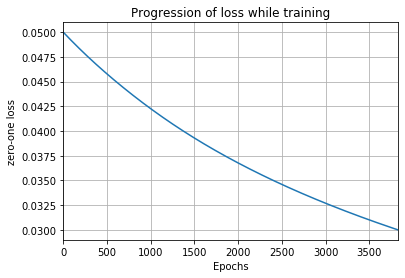

In [436]:
# plots
plt.plot(error)
plt.xlabel('Epochs')
plt.ylabel('zero-one loss')
plt.autoscale(axis='x', tight=True)
plt.title('Progression of loss while training')
plt.grid(True)
plt.savefig(path + 'zero_one_loss', dpi=300)
plt.show()

In [376]:
#----------------------------
# test set
#----------------------------

In [377]:
x = X_test
y = y_test
# create phi matrix
phi = np.insert(x, 0, [1], axis=1)
ŷ = softmax(phi,w)

In [385]:
zero_one_loss(y, max_pooling(ŷ))

(99.0, 0.033593484899898204)

In [386]:
ŷ_dec = one_hot_decoder(max_pooling(ŷ))
confusion_matrix(y_test_raw, ŷ_dec)

array([[490,   4,   2,   0,   0,   0],
       [  5, 462,   2,   0,   2,   0],
       [  2,   3, 415,   0,   0,   0],
       [  0,   1,   0, 451,  39,   0],
       [  0,   0,   0,  38, 494,   0],
       [  0,   0,   1,   0,   0, 536]])